In [ ]:
'''
# 차분
ss['diff_close'] = ss['Close'].diff(1)
# 로그
ss['log_close'] = np.log(ss['Close'])
# 로그차분
ss['logdiff_close'] = np.log(ss['Close']).diff(1)
'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# https://domini21.tistory.com/15

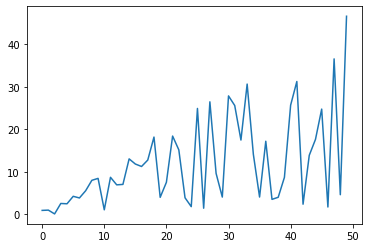

In [17]:

# 50개의 Random 시계열 생성
list_a = np.random.rand(50)

# idx만큼 증가하는 추세를 추가
list_a = [(idx+1) * val for idx, val in enumerate(list_a)]
plt.plot(list_a)
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
def adf_test(x):
    stat, p_value, lags, nobs, crit, icb = adfuller(x)
    
    return p_value

print('pvalue =', adf_test(list_a))

pvalue = 6.745569281650907e-08


비정상임

In [20]:
from pmdarima.arima import ndiffs

In [21]:
kpss_diffs = ndiffs(list_a, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(list_a, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f" d = {n_diffs}")

 d = 1


In [22]:
list_a = np.diff(list_a, n_diffs)

In [23]:
print('pvalue =', adf_test(list_a)) #정상성 다시 확인

pvalue = 2.225858760005271e-09


차분만 해도 정상이 돼..?

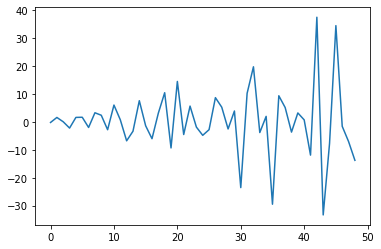

In [9]:
plt.plot(list_a)
plt.show()

C:\Users\mirae\AppData\Local\Temp\ipykernel_2328\2187924756.py:1: RuntimeWarning: invalid value encountered in log
  list_a = np.log(list_a) #로그


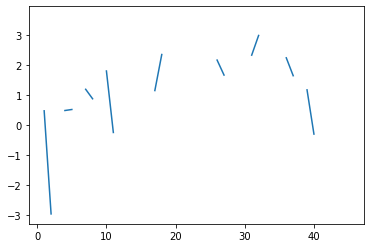

In [10]:
list_a = np.log(list_a) #로그
plt.plot(list_a)
plt.show()

In [11]:
print('pvalue =', adf_test(list_a)) #정상성 다시 확인

MissingDataError: exog contains inf or nans

정상임 

In [ ]:
import pandas as pd

In [ ]:
data = pd.DataFrame([list_a])
data = data.transpose()
data =data.dropna()
data

In [ ]:
data = np.log(data) #로그 한 번 더?

In [ ]:
#로그 두 번 하려하니까 경고뜨네 